<a href="https://colab.research.google.com/github/jorgeroldan5/Supply-Chain-Optimization/blob/main/Final_Project_Supply_Chain_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning for Supply Chain Optimization: Using Predictive Models to Optimize E-Commerce Shipping**



**Technical Report**




Jorge Roldan, Stephanie Smith, Nikita Rogers

Shiley-Marcos School of Engineering, University of San Diego

ADS-505: Applied Data Science for Business

Dillon Orr, M.S.

GitHub Repository: https://github.com/jorgeroldan5/Supply-Chain-Optimization


# Problem Statement and Data Description:

An international e-commerce company is struggling with on-time delivery of products, risking customer attrition to competitors. The purpose of this project is to leverage data science techniques to optimize the delivery performance in the e-commerce company's logistics. By analyzing the E-Commerce Shipping Dataset from
Kaggle (Gopalani, 2021), we aim to identify patterns and factors that influence delivery delays and operational
inefficiencies. The goal is to develop predictive models and actionable insights that can help ecommerce businesses improve customer satisfaction, streamline operations, and minimize shipping
expenses.

The E-Commerce Shipping Dataset contains 10,999 observations and 12 variables. The variables include order-level details, including shipping mode, customer location, product category, shipping costs, and delivery times. Currently,
businesses often rely on descriptive reports rather than predictive insights to manage their shipping
performance. By applying data mining and machine learning techniques to this dataset, we can
shift from reactive to proactive logistics management.

The data contains the following information:

ID: ID Number of Customers.

Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.

Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

Customer rating: The company is rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

Cost of the product: Cost of the Product in US Dollars.

Prior purchases: The Number of Prior Purchase.

Product importance: The company has categorized the product in the various parameter such as low, medium, high.

Gender: Male and Female.

Discount offered: Discount offered on that specific product.

Weight in gms: It is the weight in grams.

**Target variable:** Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [ ]:
# Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from dmba import gainsChart, liftChart

In [ ]:
# Load the dataset
df = pd.read_csv('/content/shipping.csv')

# Display the first 5 rows
display(df.head())

# Display the dataset information
display(df.info())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


None

# Exploratory Data Analysis (EDA)

,proportion
Reached.on.Time_Y.N,
1,0.596691
0,0.403309


,proportion
Warehouse_block,
F,0.333303
D,0.166742
A,0.166652
B,0.166652
C,0.166652


,proportion
Mode_of_Shipment,
Ship,0.678425
Flight,0.161560
Road,0.160015


,proportion
Product_importance,
low,0.481589
medium,0.432221
high,0.086190


,proportion
Gender,
F,0.504137
M,0.495863


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


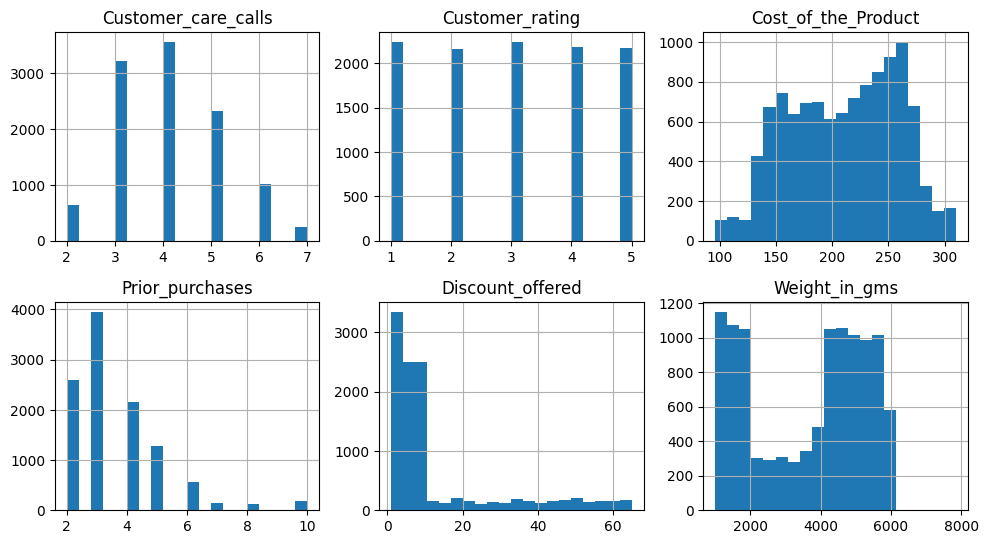

In [ ]:
# Analyze the distribution of the target variable
display(df['Reached.on.Time_Y.N'].value_counts(normalize=True))

# Analyze the distribution of categorical variables
categorical_cols = df[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']]
for col in categorical_cols:
    display(df[col].value_counts(normalize=True))

# Analyze the distribution of numerical variables
numerical_cols = df[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']]
display(numerical_cols.describe())

# Examine distributions via histograms
numerical_cols.hist(bins=20, layout=(3, 3), sharex=False, sharey=False, figsize=(10, 8))
plt.tight_layout()
plt.show()

### Data Overview
There are a total of 12 variables in the dataset. There are no missing values in the dataset with each variable having a count of 10,999 observations.

In examining the sample, 60% of shipments are delivered late to the customer vs 40% which arrive on time, highlighting an urgent need to intervene and improve delivery performance. The company maintains five different shipping warehouses, with Warehouse block F handling the majority of products(33%) while the remaining warehouse blocks hand roughly 17% each. Orders can be shipped either through Ship (boat), Air, or by Road. Most orders are sent via Ship at 70%. The company has categorized each product as either low, medium, or high importance.Product mix skews toward low and medium importance, with only 8% of products being labeled high importance. Customer gender is balanced with half male, half female customers.

Customer care calls follow a normal distribution with an average of 4 care calls per order. Average customer rating is 3 out of 5, with a nearly uniform distribution between ratings. Buyers typically have 3–4 prior purchases, right skewed with some repeat buyers in the 10 range. Discounts offered are heavily right skewed with a median of 7.00 off but ranging up to 65.00 off. Weight with a bimodal distribution with products congregating around the 1,000-2,000 grams and 4,000-5,500 grams. Cost of product ranges from 96.00 dollars to 310.00 dollars.

Per the IQR method, the variables Prior_purchases, and Discount_offered do contain some outliers. Upon closer examination, these outliers are deemed valid, as they fall within the acceptable ranges for their respective variables. The outliers in Prior_purchases, include counts of purchases 6 though 10, which are still plausible representations for repeat buyers. Similarly, any discount value greater than 20.00 is considered outliers However, these values remain valid within a realistic range, thus they are retained.

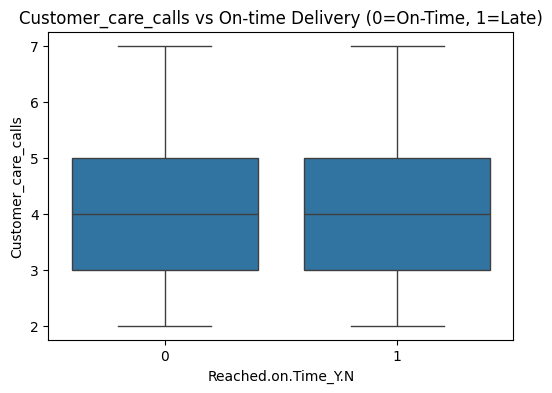

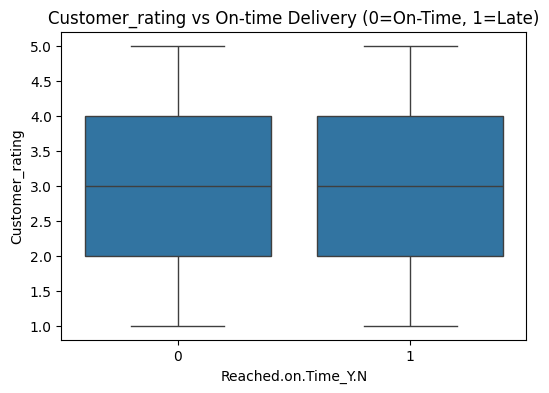

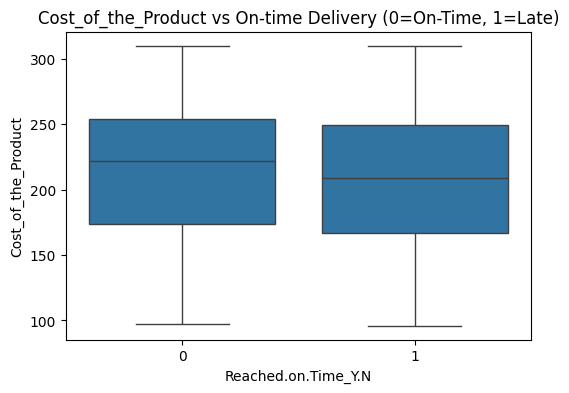

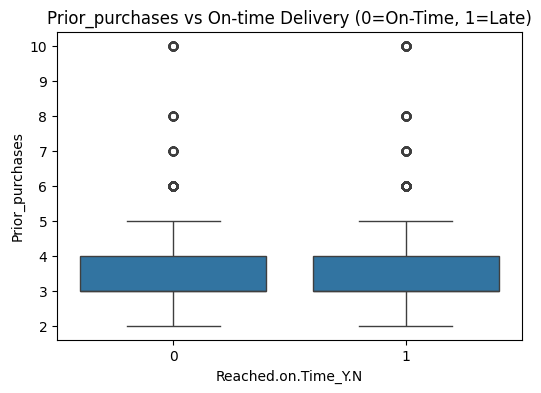

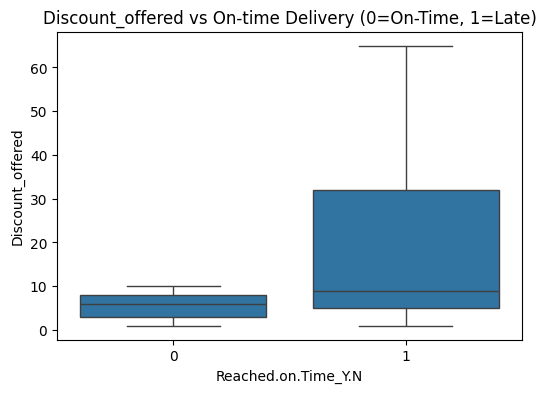

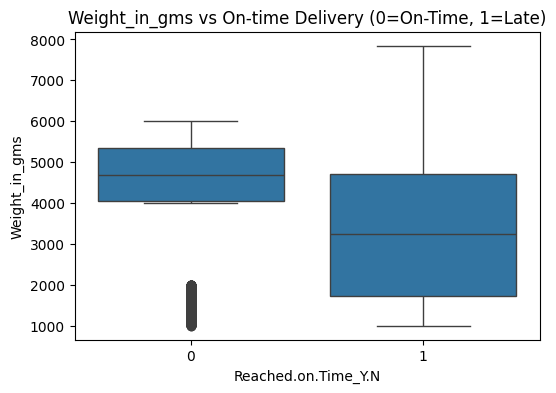

In [ ]:
# Explore the relationships between the response variable (Late Delivery) and predictor variables
for col in numerical_cols.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Reached.on.Time_Y.N', y=col, data=df)
    plt.title(f'{col} vs On-time Delivery (0=On-Time, 1=Late)')
    plt.show()

Boxplots of each numerical variable, separated by the late delivery flag, were created to visually examine any potential relationships between the predictor variables and the response variable. Visually, there are no clear predictors of late delivery for the variables Customer rating, customer care calls, and prior purchases. The distributions of these variables when comparing delivery time (0=On-time, 1=Late), including the spread and median.

For Cost of Product, the on-time delivery group has a slightly greater median cost than compared to the late delivery group. However, there is still heavy overlap between late and on-time delivery. The biggest visual differences can be seen in Discount Offered and Weight. Late orders have much greater discounts than on-time orders, with a long right tail, indicating discounts of up to 60, while the on-time group maximum is 10. In terms of weight, late orders have lower median, but a much wider spread compared to on time deliveries.


# Data pre-processing

In [ ]:
# Data Preprocessing: One-Hot Encoding for categorical variables

# Select categorical columns for one-hot encoding
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the information of the encoded DataFrame to see the new columns
display(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID                         10999 non-null  int64
 1   Customer_care_calls        10999 non-null  int64
 2   Customer_rating            10999 non-null  int64
 3   Cost_of_the_Product        10999 non-null  int64
 4   Prior_purchases            10999 non-null  int64
 5   Discount_offered           10999 non-null  int64
 6   Weight_in_gms              10999 non-null  int64
 7   Reached.on.Time_Y.N        10999 non-null  int64
 8   Warehouse_block_B          10999 non-null  bool 
 9   Warehouse_block_C          10999 non-null  bool 
 10  Warehouse_block_D          10999 non-null  bool 
 11  Warehouse_block_F          10999 non-null  bool 
 12  Mode_of_Shipment_Road      10999 non-null  bool 
 13  Mode_of_Shipment_Ship      10999 non-null  bool 
 14  Product_importance_low

None

Categorical features were identified (Warehouse Block, Mode of Shipment, and Gender). These variables were converted into numerical representations using the pd.get_dummies() function. To mitigate multicollinearity, the first category from each variable was dropped.
Subsequently, the dataset was verified to ensure all features were no remaining categorical string values.


# Data splitting

In [ ]:
# 80% of the data for training and 20% for testing.
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(columns=['Reached.on.Time_Y.N', 'ID'])
y = df_encoded['Reached.on.Time_Y.N']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8799, 15)
Shape of X_test: (2200, 15)
Shape of y_train: (8799,)
Shape of y_test: (2200,)


The dataset was split into a training set and a test set, with 80% of the original data allocated to the training set and 20% to the test set. Both the training and test sets were stratified based on the late delivery flag variable to ensure that the distribution of the target variable was preserved in both sets.


# Model Building Strategies

To help reduce costs by optimizing shipping, a good approach is to predict whether a shipment will reach on time or not. This allows the e-commerce company to take proactive measures for shipments predicted to be late, potentially saving costs associated with delays.

Since the target variable Reached.on.Time_Y.N is binary (0 for on-time, 1 for not on-time), classification models are appropriate. The model should fufill the following objectives: 1. Identify what drives late deliveries to allow improvements in the supply chain and 2. Accurately flag as many late orders as possible to allow for the implementation of preemptive measures. Three potential classification models were explored.


Logistic Regression: A simple yet powerful linear model that provides probabilities and insights into feature importance. Logistic regression is well suited for this scenario because it models binary outcomes using the logit function, which estimates the probability of an event occurring by mapping outputs to a range between 0 and 1 (Shmueli et al., 2020). This makes it an effective and interpretable choice for estimating the likelihood of late delivery.


Random Forest: An ensemble method that can capture complex non-linear relationships and is generally robust to overfitting. This technique combines multiple decision trees to improve the model's accuracy and robustness. Each tree in the forest is trained on a random subset of the data, and at each split, a random subset of features is considered, which helps reduce overfitting and increases model generalization. The final prediction is made by using a majority vote (Shmueli et al., 2020). If the data has non-linear relationships the random forest model will better capture those than compared to the logistic regression model.

Histogram-based Gradient Boosting Classification Tree: Another powerful ensemble method known for high performance. Gradient Boosting is technique that builds classification trees sequentially, with each new model learning from the errors made in the previous ones. This method is a variation of a traditional Gradient Boosting model that improves the efficiency of the traditional gradient boosting algorithm by discretizing continuous input features into histograms (Brownlee, 2021). This model is well suited for the dataset as two of the potential main predictor variables (Weight, Discount) are continuous. Additionally, this method is well suited for larger datasets as this approach can reduce the computational costs.

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, max_iter=2000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_prob_logit_reg = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)


print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-score: {f1_log_reg:.4f}")


# Get the coefficients of the Logistic Regression model
coefficients = log_reg.coef_[0]

# Get the feature names
feature_names = X_train.columns

# Create a pandas Series to easily view coefficients with their corresponding feature names
coeff_series = pd.Series(coefficients, index=feature_names)

# Sort the coefficients by their absolute value to see the most influential features
sorted_coefficients = coeff_series.abs().sort_values(ascending=False)

# Display the sorted coefficients
print("\nSorted Coefficients (by absolute value) of Logistic Regression Model:")
display(coeff_series[sorted_coefficients.index])

Logistic Regression Performance:
Accuracy: 0.6368
Precision: 0.7063
Recall: 0.6702
F1-score: 0.6878

Sorted Coefficients (by absolute value) of Logistic Regression Model:


,0
Discount_offered,1.820533
Weight_in_gms,-0.374054
Product_importance_medium,-0.174226
Product_importance_low,-0.167894
Customer_care_calls,-0.138873
Prior_purchases,-0.118928
Cost_of_the_Product,-0.084296
Warehouse_block_D,0.036488
Customer_rating,0.033987
Mode_of_Shipment_Road,-0.021513


The logistic regression uses an L2 ridge regularization penalty, which shrinks weaker coefficients toward zero (Shmueli et al., 2020). To keep the model fair across scales variables were standardized first. The model was fit using the training dataset and the evaluation metrics were calculated using the test data.

The largest effect is Discount_offered, with a coefficent of 1.82, and odd ratio of 6.2 (e^1.82). This means a one standard-deviation rise in discount multiplies the odds of a late delivery by about 6 times. The negative Weight coefficient indicates that heavier shipments are less likely to be late. Relative to high importance, both medium and low product-importance categories have lower odds of lateness. Additionally, as customer-care calls increase, the odds of lateness decrease slightly. Coefficients for warehouse block and mode of shipment are small in magnitude, suggesting their main effects are less impactful compared to other factors.

In [ ]:
# Initialize and train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42,)

rf_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf_clf = rf_clf.predict(X_test_scaled)


# Evaluate the model
accuracy_rf_clf = accuracy_score(y_test, y_pred_rf_clf)
precision_rf_clf = precision_score(y_test, y_pred_rf_clf)
recall_rf_clf = recall_score(y_test, y_pred_rf_clf)
f1_rf_clf = f1_score(y_test, y_pred_rf_clf)


print("Random Forest Performance:")
print(f"Accuracy: {accuracy_rf_clf:.4f}")
print(f"Precision: {precision_rf_clf:.4f}")
print(f"Recall: {recall_rf_clf:.4f}")
print(f"F1-score: {f1_rf_clf:.4f}")

# Examine feature importance
feat_importance_rf = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nTop importances:\n", feat_importance_rf.head(20))


Random Forest Performance:
Accuracy: 0.6545
Precision: 0.7577
Recall: 0.6192
F1-score: 0.6815

Top importances:
 Weight_in_gms                0.271379
Discount_offered             0.227771
Cost_of_the_Product          0.174781
Prior_purchases              0.066176
Customer_rating              0.061351
Customer_care_calls          0.059900
Gender_M                     0.022947
Mode_of_Shipment_Ship        0.018807
Warehouse_block_F            0.016979
Product_importance_low       0.014234
Product_importance_medium    0.014055
Warehouse_block_B            0.013617
Warehouse_block_C            0.012772
Warehouse_block_D            0.012626
Mode_of_Shipment_Road        0.012604
dtype: float64


In [ ]:
# Initialize and train the HistGradientBoosting model
hgb_clf = HistGradientBoostingClassifier(random_state=42)
hgb_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_hgb_clf = hgb_clf.predict(X_test_scaled)

# Evaluate the model
accuracy_hgb_clf = accuracy_score(y_test, y_pred_hgb_clf)
precision_hgb_clf = precision_score(y_test, y_pred_hgb_clf)
recall_hgb_clf = recall_score(y_test, y_pred_hgb_clf)
f1_hgb_clf = f1_score(y_test, y_pred_hgb_clf)

print("HistGradientBoosting Performance:")
print(f"Accuracy: {accuracy_hgb_clf:.4f}")
print(f"Precision: {precision_hgb_clf:.4f}")
print(f"Recall: {recall_hgb_clf:.4f}")
print(f"F1-score: {f1_hgb_clf:.4f}")


HistGradientBoosting Performance:
Accuracy: 0.6568
Precision: 0.7859
Recall: 0.5842
F1-score: 0.6702


# Final Model Selection

Given the goal of reducing costs by optimizing shipping and predicting late deliveries (which corresponds to Reached.on.Time_Y.N == 1), recall is a very important metric. High recall means the model is good at identifying most of the actual late shipments, allowing the company to take proactive measures. The F1-score, which is a harmonic mean of precision and recall, also provides a balanced measure of the model's performance.

In this case, the **Logistic Regression** model has the highest recall (0.6702) and F1-score (0.6878), making it the most suitable model for this specific problem of identifying potential late deliveries to optimize shipping and reduce costs. It is also the easiest to interpret, clearly showing which features drive lateness, so operations can act on specific drivers rather than treating all orders the same.

When the model flags an order as late, it is correct 71% of the time, and the model is able to identify 67% of all late shipments. A F1 score of 0.69 indicates a workable balance between finding late orders and not over-flagging.

The Random Forest model resulted in an Accuracy of 0.65, Precision of 0.76, Recall of 0.62, and F1 score of 0.68. While the Random Forest has higher precision,  it misses more late orders than Logistic Regression.

The Histogram-based Gradient Boosting Classification Tree resulted in an Accuracy of 0.66, Precision of 0.79, but Recall of 0.58, F1 of 0.67. This model has the highest precision, meaning it results in the fewest false positives. However with a lower recall, indicating it flags fewer orders and misses the most lates deliveries.

While Logistic Regression produces more false positives than the tree-based models, the objective is to catch as many late deliveries as possible, so recall is the priority metric.

In [ ]:
# Create a dictionary with the performance metrics
performance_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'HistGradientBoosting'],
    'Accuracy': [accuracy_log_reg, accuracy_rf_clf, accuracy_hgb_clf],
    'Precision': [precision_log_reg, precision_rf_clf, precision_hgb_clf],
    'Recall': [recall_log_reg, recall_rf_clf, recall_hgb_clf],
    'F1-score': [f1_log_reg, f1_rf_clf, f1_hgb_clf]
}

# Create a DataFrame from the dictionary
performance_df = pd.DataFrame(performance_data)

# Display the performance comparison table
display(performance_df)

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.636818,0.706260,0.670221,0.687769
1,Random Forest,0.654545,0.757689,0.619193,0.681475
2,HistGradientBoosting,0.656818,0.785861,0.584158,0.670162


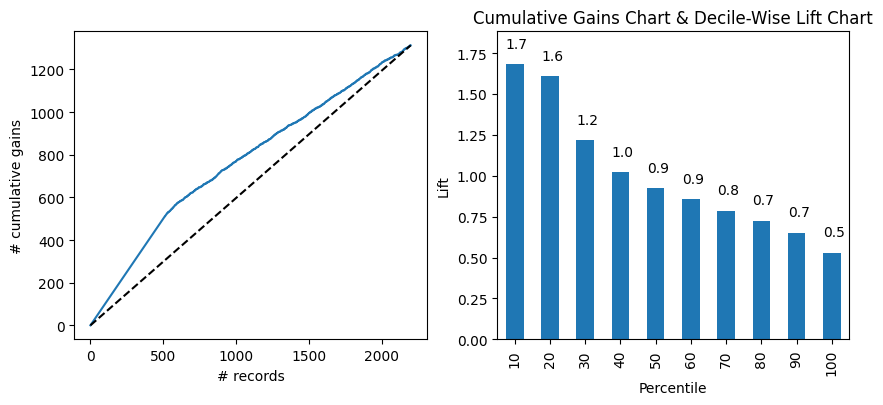

In [ ]:

# Construct a Cumulative Gains Chart to examine model performance in terms of lift

logit_result = pd.DataFrame({
    'actual':    y_test.values,
    'p(1)':      y_prob_logit_reg,
    'p(0)':      1 - y_prob_logit_reg,
    'predicted': y_pred_log_reg}, index=y_test.index)


chart_df = logit_result.sort_values('p(1)', ascending=False).reset_index(drop=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(chart_df['actual'], ax=axes[0])
liftChart(chart_df['p(1)'], title=False, ax=axes[1])


plt.title('Cumulative Gains Chart & Decile-Wise Lift Chart')
plt.show()

Gains and Lift charts were constructed to assess how well the model predicts late shipments compared to a baseline model of random selection. The cumulative-gains curve indicates the logistic regression model consistently captures more late shipments even as the probability of lateness decreases.

The decile-wise lift tells us that taking 20% of the shipments that are ranked as the most probable late deliveries yields 1.6 times as correct classifications as a random selection of 20% of shipments would. Lift sees a greater decline after the second decile.

This supports the use of the logistic regression prediction outputs, as the company can first prioritize the top 20% of highest-risk orders, making proactive measures highly targeted.

The Logistic Regression model, which showed the best performance in terms of recall and F1-score for predicting late deliveries, revealed that **Discount Offered** is the most significant factor influencing whether a shipment will be late. Higher discounts are strongly associated with a higher likelihood of late delivery. **Product Importance** also plays a role, with lower importance products being less likely to be delayed compared to high-importance ones.


**Preliminary Recommendations:**

1. Investigate the Discounted Item: Deep dive into the logistics and handling process for products with high discounts. Identify any bottlenecks, different shipping procedures, or potential reasons why these items are more prone to delays. Optimizing this workflow could significantly reduce late deliveries and associated costs.

2. Review Shipping Strategies for Discounted Items: Consider whether different shipping modes, carriers, or service levels should be used for heavily discounted products to improve their on-time performance. This might involve adjusting pricing or explicitly setting customer expectations for delivery times on these items.

3. Prioritize Shipping Based on Product Importance: Continue to prioritize the shipping of high-importance products, as the model suggests they are more likely to be delayed. Ensure robust processes are in place for these shipments.

4. Analyze Shipping of Lighter vs. Heavier Items: While not as strong a predictor as discounts, the inverse relationship between weight and late deliveries could be explored further. Understand if the handling or shipping methods for lighter items contribute to delays and identify potential improvements.

By implementing these recommendations, the e-commerce company can leverage the insights from the predictive model to proactively address factors contributing to late deliveries, ultimately optimizing their shipping process and reducing costs.

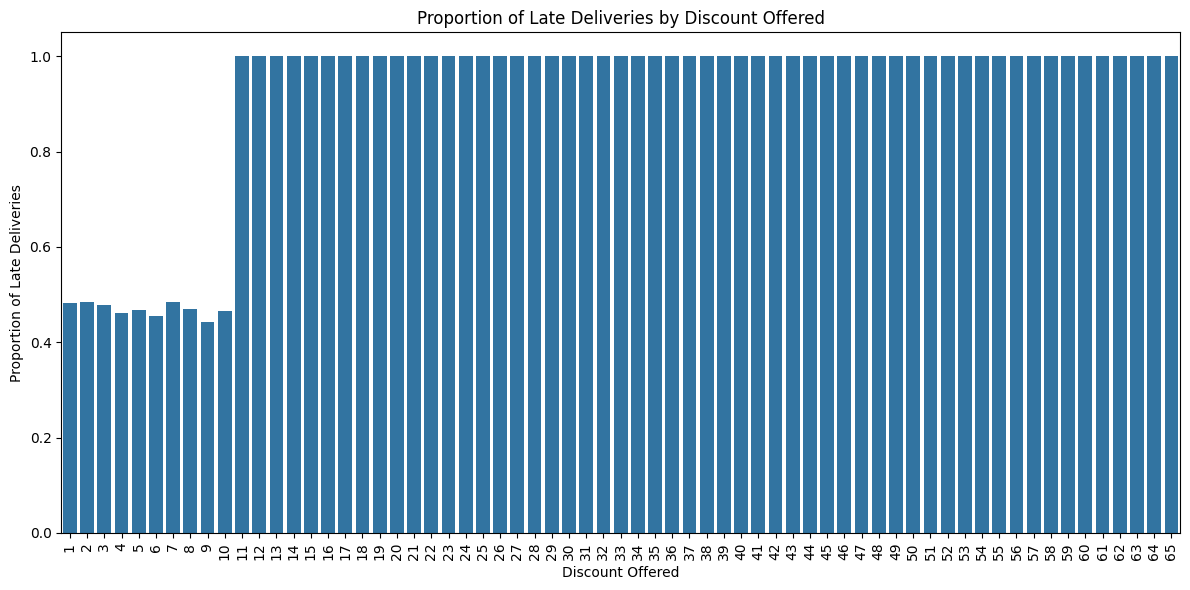

In [ ]:
# Calculate the proportion of late deliveries for each discount offered
discount_delivery_proportion = df.groupby('Discount_offered')['Reached.on.Time_Y.N'].value_counts(normalize=True).unstack().fillna(0)

# If you want the proportion of late deliveries (where Reached.on.Time_Y.N is 1)
late_delivery_proportion = discount_delivery_proportion[1]

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=late_delivery_proportion.index, y=late_delivery_proportion.values)
plt.xlabel('Discount Offered')
plt.ylabel('Proportion of Late Deliveries')
plt.title('Proportion of Late Deliveries by Discount Offered')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From the visualization above, we can see that as the discount offered increases, the proportion of late deliveries also tends to increase, especially for discounts above a certain threshold. This emphasizes the importance of investigating the workflow and shipping strategies for heavily discounted items.

In [ ]:
# Calculate the proportion of late deliveries for each warehouse block
warehouse_delivery_proportion = df.groupby('Warehouse_block')['Reached.on.Time_Y.N'].value_counts(normalize=True).unstack().fillna(0)

# Get the proportion of late deliveries (where Reached.on.Time_Y.N is 1)
late_delivery_by_warehouse = warehouse_delivery_proportion[1]

# Sort the results to easily identify blocks with the highest late delivery rates
sorted_late_delivery_by_warehouse = late_delivery_by_warehouse.sort_values(ascending=False)

# Display the late delivery rate by warehouse block
print("Proportion of Late Deliveries by Warehouse Block:")
display(sorted_late_delivery_by_warehouse)

Proportion of Late Deliveries by Warehouse Block:


,1
Warehouse_block,
B,0.602291
F,0.598472
D,0.597601
C,0.596836
A,0.586470


# Proportion of late deliveries for each warehouse block:

The results show the proportion of late deliveries for each warehouse block:

Block B: 60.23% late deliveries

Block F: 59.85% late deliveries

Block D: 59.76% late deliveries

Block C: 59.68% late deliveries

Block A: 58.65% late deliveries


While there are slight variations, the late delivery rates across all warehouse blocks (A-E and F) are quite similar, ranging from approximately 58.65% to 60.23%. There isn't a clear indication that any specific block consistently underperforms significantly compared to the others based on this analysis.

This suggests that the warehouse block itself might not be a major contributing factor to late deliveries compared to other variables we analyzed, like the discount offered.

# Proportion of Late Deliveries by Product Importance:

In [ ]:
# Calculate the proportion of late deliveries for each product importance level
product_importance_delivery_proportion = df.groupby('Product_importance')['Reached.on.Time_Y.N'].value_counts(normalize=True).unstack().fillna(0)

# Get the proportion of late deliveries (where Reached.on.Time_Y.N is 1)
late_delivery_by_product_importance = product_importance_delivery_proportion[1]

# Sort the results
sorted_late_delivery_by_product_importance = late_delivery_by_product_importance.sort_values(ascending=False)

# Display the late delivery rate by product importance
print("Proportion of Late Deliveries by Product Importance:")
display(sorted_late_delivery_by_product_importance)

Proportion of Late Deliveries by Product Importance:


,1
Product_importance,
high,0.649789
low,0.592788
medium,0.590450


This shows that products with high importance have a noticeably higher proportion of late deliveries compared to products with low or medium importance. This aligns with the insight from the Logistic Regression model's coefficients and reinforces the recommendation to prioritize the shipping of high-importance products.

# Proportion of Late Deliveries by Mode of Shipment:

In [ ]:
# Calculate the proportion of late deliveries for each mode of shipment
shipment_mode_delivery_proportion = df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].value_counts(normalize=True).unstack().fillna(0)

# Get the proportion of late deliveries (where Reached.on.Time_Y.N is 1)
late_delivery_by_shipment_mode = shipment_mode_delivery_proportion[1]

# Sort the results
sorted_late_delivery_by_shipment_mode = late_delivery_by_shipment_mode.sort_values(ascending=False)

# Display the late delivery rate by mode of shipment
print("Proportion of Late Deliveries by Mode of Shipment:")
display(sorted_late_delivery_by_shipment_mode)

Proportion of Late Deliveries by Mode of Shipment:


,1
Mode_of_Shipment,
Flight,0.601576
Ship,0.597561
Road,0.588068


Similar to the warehouse blocks, the late delivery rates across different modes of shipment are relatively close, with only slight variations. While Flight has a slightly higher rate and Road a slightly lower rate, the differences are not as pronounced as the impact of Discount_offered or Product_importance.

# Final Results and Interpretation

**1. Higher Discounts → Higher Likelihood of Late Delivery**

This pattern suggests discount-driven operational strain.

Possible explanations:

Operational overload during promotions:
When discounts increase, order volumes spike, overwhelming warehouse and logistics capacity.
→ Result: delayed processing, slower shipping modes, stockouts.

Lower shipping priority:
Discounted items often have thinner profit margins, so companies cut costs on logistics (e.g., choosing road over air or ship instead of flight).

Inventory imbalance:
Discounts might target slow-moving stock located in distant warehouses.
→ Longer routes and handling delays.

Behavioral/customer effect:
Discount buyers may cluster in specific regions with slower delivery networks or less efficient last-mile service.

**2. Higher Product Importance → Higher Likelihood of Late Delivery**

This implies a priority gap: the products the company considers “important” (strategically or financially) are not being operationally prioritized.

Possible explanations:

Complex handling:
High-importance products might be fragile, expensive, or require extra packaging, QC, or documentation — increasing processing time.

Limited stock or production:
High-importance SKUs may have more demand than supply, leading to backorders and wait times.

Overcentralized fulfillment:
These products could be stocked in fewer warehouses (e.g., Block A only), causing bottlenecks or long-distance shipping.

Shipment method mismatch:
Despite being “important,” they may not always be allocated to faster modes due to cost concerns.

# Testing Possible Explanations

In [ ]:
# Cross-tabulate Product importance, Warehouse block, and Late delivery rate
cross_tab_importance_warehouse = pd.crosstab(
    [df['Product_importance'], df['Warehouse_block']],
    df['Reached.on.Time_Y.N'],
    normalize='index'
).fillna(0)

# Rename the columns for clarity
cross_tab_importance_warehouse.rename(columns={0: 'On-time Delivery Rate', 1: 'Late Delivery Rate'}, inplace=True)

# Display the cross-tabulation table, focusing on the Late Delivery Rate
print("Late Delivery Rate by Product Importance and Warehouse Block:")
display(cross_tab_importance_warehouse[['Late Delivery Rate']])

Late Delivery Rate by Product Importance and Warehouse Block:


Reached.on.Time_Y.N                 Late Delivery Rate
Product_importance Warehouse_block                    
high               A                          0.672727
                   B                          0.684932
                   C                          0.648810
                   D                          0.626506
                   F                          0.633663
low                A                          0.590759
                   B                          0.571930
                   C                          0.610984
                   D                          0.595696
                   F                          0.593468
medium             A                          0.562582
                   B                          0.618990
                   C                          0.570164
                   D                          0.593631
                   F                          0.597353

The cross-tabulation table shows the late delivery rate for each combination of product importance and warehouse block. Looking at the "Late Delivery Rate" column, we can observe that:

For high importance products, warehouse blocks B and A show slightly higher late delivery rates compared to other blocks.
For low and medium importance products, the late delivery rates are generally lower than for high importance products.

This suggests that while warehouse block alone might not be a major factor, there could be some interaction effects or specific operational challenges within certain blocks when handling high-importance items.

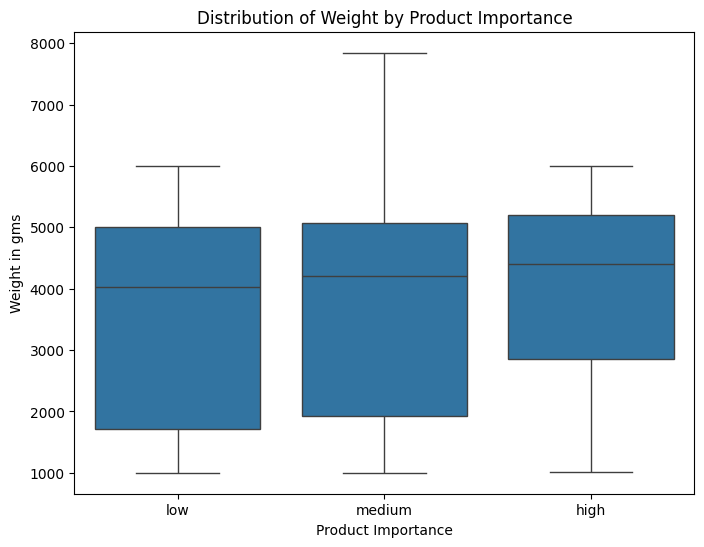

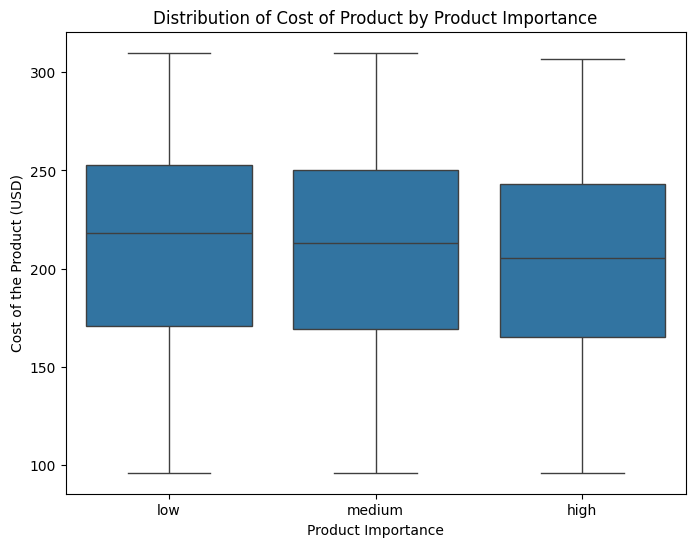

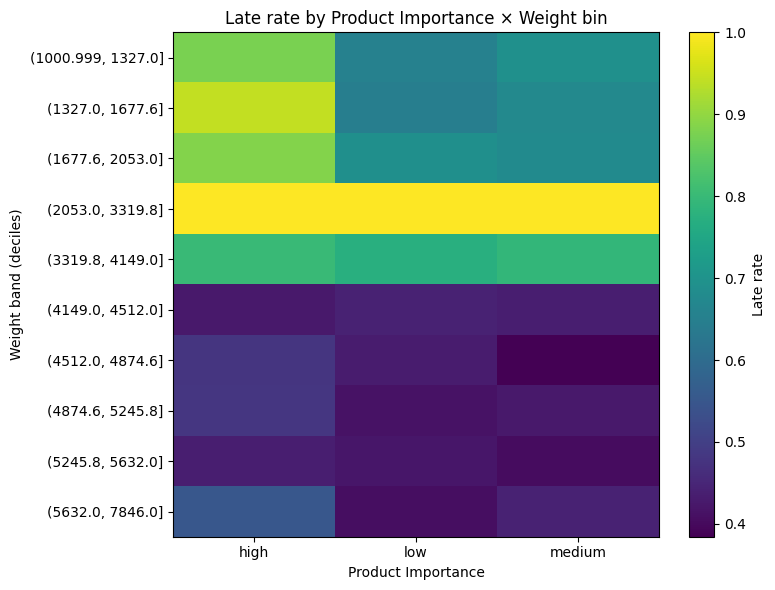

In [ ]:
# Analyze Weight distribution by Product importance using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Product_importance', y='Weight_in_gms', data=df, order=['low', 'medium', 'high'])
plt.xlabel('Product Importance')
plt.ylabel('Weight in gms')
plt.title('Distribution of Weight by Product Importance')
plt.show()

# Analyze Cost of Product distribution by Product importance using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Product_importance', y='Cost_of_the_Product', data=df, order=['low', 'medium', 'high'])
plt.xlabel('Product Importance')
plt.ylabel('Cost of the Product (USD)')
plt.title('Distribution of Cost of Product by Product Importance')
plt.show()

# Analyze Weight distribution by Product importance using a heat map
df['weight_bin'] = pd.qcut(df['Weight_in_gms'], 10, duplicates='drop')

agg = (df.groupby(['weight_bin','Product_importance'], observed=False)['Reached.on.Time_Y.N']
         .mean()
         .reset_index())

mat = agg.pivot(index='weight_bin', columns='Product_importance', values='Reached.on.Time_Y.N')

plt.figure(figsize=(8,6))
im = plt.imshow(mat.values, aspect='auto')
plt.colorbar(im, label='Late rate')

plt.xticks(ticks=np.arange(mat.shape[1]), labels=mat.columns, rotation=0)
plt.yticks(ticks=np.arange(mat.shape[0]), labels=[str(i) for i in mat.index])

plt.xlabel('Product Importance')
plt.ylabel('Weight band (deciles)')
plt.title('Late rate by Product Importance × Weight bin')
plt.tight_layout()
plt.show()

The box plots provide insights into the typical weight and cost of products based on their importance:

Weight Distribution: High-importance products are somewhat heavier on average than low/medium, as they have a higher median. Though all three groups have wide overlap.

Cost Distribution: High-importance products are not more expensive. Their median cost is slightly lower than low/medium importance products.

In examining the heat map, lateness is concentrated in low weight products (1,000-4,000 grams) for all importance levels. Outside the 4,000 gm bin, high-importance items do show higher lateness rates at heavier weights compared with other importance categories.

**Overall Insights:**

These analyses provide further context for why high-importance products have a higher likelihood of late delivery. The higher late rate on high-importance items is not due to price, rather it’s more consistent with weight/handling complexity and the low/mid-weight band, especially when paired with discounts.

Handling Requirements: Heavier items might require special handling, packaging, or security measures, which could add to processing time.

Inventory Management: Heavier items might be stored in specific locations or have different inventory management procedures that could impact shipping speed.

These findings reinforce the recommendation to investigate the specific handling and shipping processes for high-importance and heavily discounted items, considering their weight as potential contributing factors to delays.

In [ ]:
# Create discount tiers
bins = [0, 10, 20, 30, 40, 50, float('inf')]
labels = ['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51%+']
df['Discount_Tier'] = pd.cut(df['Discount_offered'], bins=bins, labels=labels, right=True, include_lowest=True)

# Display the value counts for the new Discount_Tier column
display(df['Discount_Tier'].value_counts(normalize=True))

,proportion
Discount_Tier,
0-10%,0.759342
51%+,0.066642
41-50%,0.046095
11-20%,0.045095
31-40%,0.042731
21-30%,0.040095


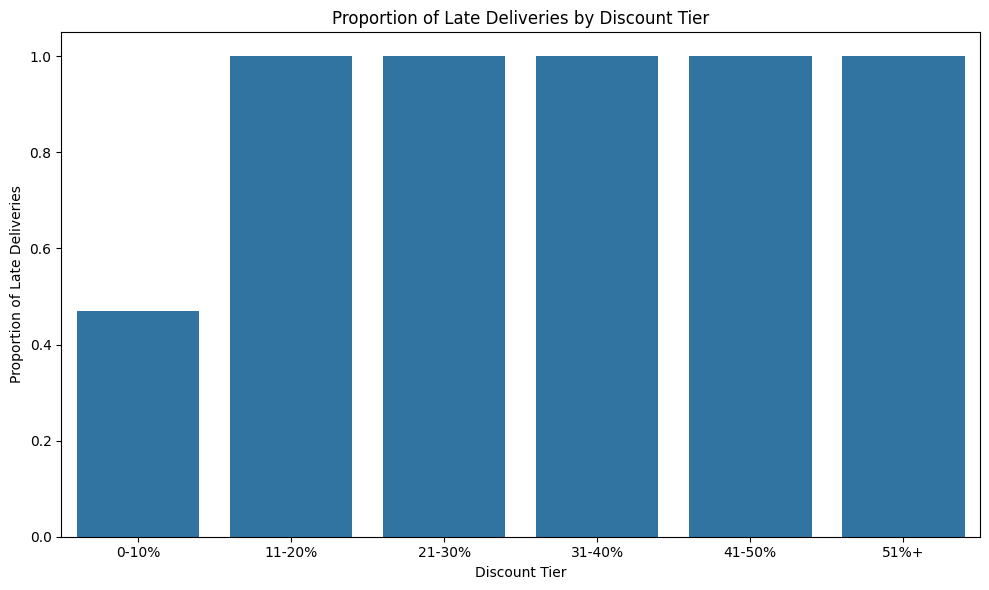

In [ ]:
# Calculate the proportion of late deliveries for each discount tier
late_delivery_by_discount_tier = df.groupby('Discount_Tier', observed=False)['Reached.on.Time_Y.N'].value_counts(normalize=True).unstack().fillna(0)

# Get the proportion of late deliveries (where Reached.on.Time_Y.N is 1)
late_delivery_proportion_by_tier = late_delivery_by_discount_tier[1]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=late_delivery_proportion_by_tier.index, y=late_delivery_proportion_by_tier.values)
plt.xlabel('Discount Tier')
plt.ylabel('Proportion of Late Deliveries')
plt.title('Proportion of Late Deliveries by Discount Tier')
plt.tight_layout()
plt.show()

The bar plot clearly illustrates the relationship between discount tiers and the proportion of late deliveries:

The "0-10%" discount tier has the lowest proportion of late deliveries (around 47%).
As the discount tier increases, the proportion of late deliveries significantly increases.
For discount tiers of "21-30%", "31-40%", "41-50%", and "51%+", the proportion of late deliveries is very high, approaching 100%.
This visualization strongly supports the earlier finding that higher discounts are associated with a much higher likelihood of late delivery.

Overall Insights:

Combining these analyses, it appears that the higher late delivery rate for heavily discounted items is not primarily driven by a change in the distribution of shipment modes used for these items. **This suggests that other factors related to discounted products, such as handling, inventory location, or processing volume during promotional periods, might be contributing more significantly to the delays.**



# Discussion and conclusions

Based on our analysis, here's what the findings suggest for the company's supply chain strategy:

1. Discounts are a Major Operational Challenge: The strongest finding is the clear link between higher discounts and late deliveries. Specifically orders with a a 20% or greater discount are much more likely to be late. This indicates that current supply chain processes are not effectively handling the increased volume or specific characteristics of discounted orders. Discounts create volume surges that the supply chain cannot absorb which means there is a structural mismatch between marketing and logistics

**Action:**
* The company needs to integrate sales and marketing strategies (like promotions) more closely with supply chain capacity planning. Instead of discounts being solely a sales decision, the supply chain's capacity and capabilities to handle discounted volumes and specific discounted items must be a key consideration before promotions are run.

* Run promotions only where warehouse and carrier capacity can handle it. This includes creating promotional guardrails by capping the number of 20%+ discounts on items.

* Auto-adjust delivery promises for high-risk orders. Flag the top 20% high-risk orders measured by the prediction output. For these orders extend the promised delivery window to ensure realistic delivery times.




---



2. High-Importance Products Need Prioritized Handling, Not Just Designation: Products deemed "high importance" by the company are ironically more likely to be late. This suggests a disconnect between the strategic importance assigned to these products and the operational priority they receive in the supply chain. Their higher weight and cost likely contribute to this, requiring more complex handling.

**Action:**
The supply chain strategy needs to ensure that operational processes truly prioritize high-importance items. For the top 20% highest-risk orders, this could involve dedicated handling procedures, faster internal transfer methods, or ensuring they are stocked in strategically located warehouses that enable faster delivery. The company needs to redefine internal logistics, ensuring“high-importance” units get automatic priority in picking, packing, and shipping queues.




---



3. Warehouse Blocks and Shipment Modes are Less Differentiators of Delay: While there are slight variations, the analysis showed that late delivery rates are relatively consistent across warehouse blocks and shipment modes. This suggests that the choice of block or mode for a standard shipment might not be the primary driver of delays. The issues seem to lie more with the type of product (discounted, high-importance, heavy/costly) and how those specific items flow through the system, regardless of the block or mode.

**Action:** Focusing solely on optimizing standard warehouse assignments or slightly tweaking shipment mode allocation for all products is unlikely to significantly reduce late deliveries. The strategic focus should be on creating differentiated workflows and priorities for problematic categories like heavily discounted and high-importance items.



---



4. Potential Need for Differentiated Supply Chain Flows: The findings point towards the need for a more segmented supply chain approach. Instead of a one-size-fits-all strategy, the company could benefit from designing specific logistics flows for different product categories based on factors like discount level and importance.

**Action:** This could involve dedicated picking/packing areas for high-discount items during peak promotion periods, specialized handling protocols for high-importance products, or even considering alternative fulfillment options for these categories if the current infrastructure is a bottleneck.

The findings highlight that the company's supply chain challenges are significantly influenced by product-specific attributes like discount and importance, rather than just general factors like warehouse location or standard shipment mode. The strategy should shift towards creating more agile and differentiated operational processes that can effectively handle the unique demands of these product categories to optimize the supply chain by improving on-time delivery and, consequently, reduce costs associated with delays and improve customer satisfaction.



---
5. Customer care calls are correlated with slightly fewer delays, indicating that the burden of monitoring is currently being put on the customer. It is possible customers call more when something looks off, which nudges operations to react.

**Action:** For the top 20% hisk risk orders, apply a two call rule, if an order generates two or more calls, to automatically prioritize these orders. Upgrade the shipping or offer a small credit automatically.


| Area                     | Problem                                                       | Solution                                                                              |
| ------------------------ | ------------------------------------------------------------- | ------------------------------------------------------------------------------------- |
| **Marketing**            | Promotions drive volume spikes and delays.                    | Align discount campaigns with capacity forecasts. Offer smaller, staggered discounts. |
| **Operations**           | Important SKUs face delays.                                   | Prioritize by importance tag. Use “express lanes” or air freight allocation.          |
| **Inventory management** | Important items are delayed due to limited stock or location. | Reallocate stock closer to high-demand zones.                                         |
| **Logistics planning**   | High discount = slow transport modes.                         | Enforce minimum service levels even for discounted orders.                            |


# References

Brownlee, J. (2021). _Histogram-based gradient boosting ensembles in Python_. Machine Learning Mastery. https://www.machinelearningmastery.com/histogram-based-gradient-boosting-ensembles/

Gopalani, P. (2021). _E-commerce shipping data_ [Data set]. Kaggle. https://www.kaggle.com/datasets/prachi13/customer-analytics/data

Shmueli, G., Bruce, P., Gedeck, P., Patel R. N., (2019). _Data mining for business analytics: concepts techniques and applications in python_. Wiley.